In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import linalg

filePath = "/content/iris_data.csv - iris_data.csv.csv"

#Q1]

1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class             int64
dtype: object
0    35
1    35
2    35
Name: class, dtype: int64


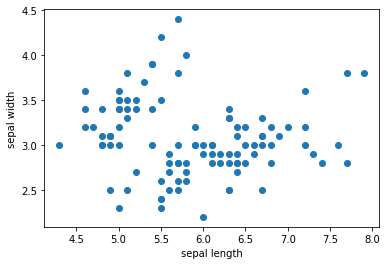

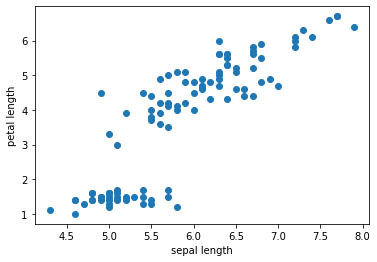

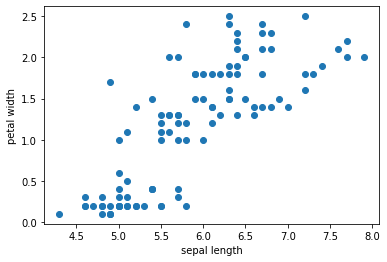

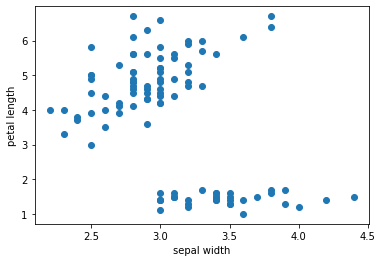

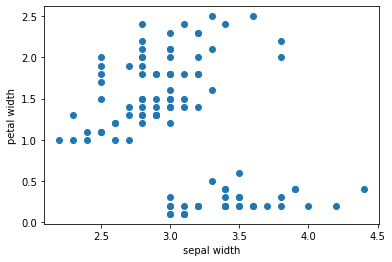

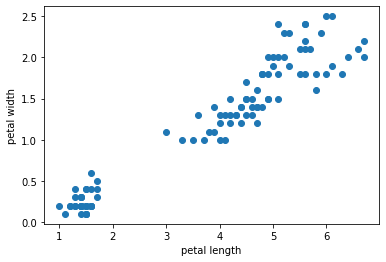

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df = pd.read_csv(filePath)
df = df.fillna(df.mean())
lbcode = LabelEncoder()
df["class"] = lbcode.fit_transform(df["class"])

# xTemp = df.drop('class', axis = 1)
# yTemp = df['class']
# x = []
# y = []
# for i in range(3):
#     x.append(xTemp[df['class'] == i])
#     y.append(yTemp[df['class'] == i])

# l = []
# for i in range(3):
#     l.append(train_test_split(x[i],y[i],train_size  =0.7, random_state=0))

# l[0][2]

x= df.drop('class', axis = 1)                                                 #drop output from dataset and store in x
y= df['class']  
print(df.dtypes)                                                                 #define y as output

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size  =0.7, random_state=3, stratify = y) #split
print(y_train.value_counts())

for i in range(len(x_train.columns)):
    for j in range(i + 1 , len(x_train.columns)):
        plt.scatter(x_train[x_train.columns[i]], x_train[x_train.columns[j]])
        plt.xlabel(x_train.columns[i])
        plt.ylabel(x_train.columns[j])
        plt.show()
        print()

df.head()


2] 3]

In [ ]:
from pandas.core.frame import DataFrame
# petal length vs sepal length
# petal lenght vs sepal width
# petal width vs petal length

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

l = [['petal length', 'sepal length'], ['petal length', 'sepal width'], ['petal width', 'petal length']]
models = []
for i in range(3):
    model = QuadraticDiscriminantAnalysis(store_covariance = True)
    model.fit(pd.concat([pd.DataFrame(x_train[l[i][0]]), pd.DataFrame(x_train[l[i][1]])], axis = 1), y_train)
    print("Accuracy for features", l[i][0], l[i][1], ":", acc(y_test, model.predict(pd.concat([pd.DataFrame(x_test[l[i][0]]), pd.DataFrame(x_test[l[i][1]])], axis = 1))) * 100, "%")
    print("Model covariance", model.covariance_)
    print("Model means", model.means_)
    print()
    models.append(model)


# for i in range(3):
#     model.fit(pd.concat([pd.DataFrame(x_train[l[i][0]]), pd.DataFrame(x_train[l[i][1]])], axis = 1), y_train)
#     print("Accuracy for features", l[i][0], l[i][1], ":", acc(y_test, model.predict(pd.concat([pd.DataFrame(x_test[l[i][0]]), pd.DataFrame(x_test[l[i][1]])], axis = 1))) * 100, "%")
#     print("Model covariance", model.covariance_)
#     print("Model means", model.means_)
#     print()


Accuracy for features petal length sepal length : 93.33333333333333 %
Model covariance [array([[0.02663866, 0.01470588],
       [0.01470588, 0.116     ]]), array([[0.21551261, 0.17521849],
       [0.17521849, 0.26433613]]), array([[0.32902521, 0.337     ],
       [0.337     , 0.43223529]])]
Model means [[1.44285714 5.06      ]
 [4.25142857 5.95142857]
 [5.55428571 6.58      ]]

Accuracy for features petal length sepal width : 93.33333333333333 %
Model covariance [array([[0.02663866, 0.00281513],
       [0.00281513, 0.12546218]]), array([[0.21551261, 0.07958824],
       [0.07958824, 0.07635294]]), array([[0.32902521, 0.09395798],
       [0.09395798, 0.10557983]])]
Model means [[1.44285714 3.44285714]
 [4.25142857 2.78      ]
 [5.55428571 3.00285714]]

Accuracy for features petal width petal length : 95.55555555555556 %
Model covariance [array([[0.0137479 , 0.00697479],
       [0.00697479, 0.02663866]]), array([[0.03702521, 0.06410924],
       [0.06410924, 0.21551261]]), array([[0.066168

4]

(200, 200) (200, 200) (40000, 2) (200, 200)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


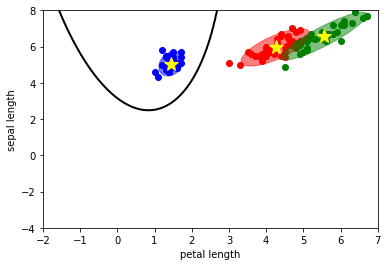

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


(200, 200) (200, 200) (40000, 2) (200, 200)


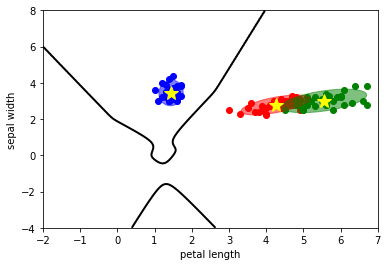

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


(200, 200) (200, 200) (40000, 2) (200, 200)


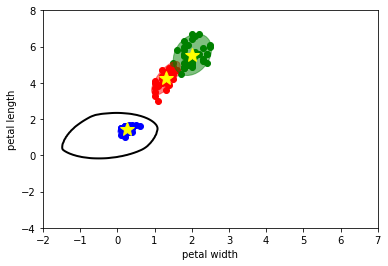

In [ ]:
import matplotlib as mpl
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = mpl.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5, 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

for i in range(3):

    xx, yy = np.meshgrid(np.linspace(-2, 7, 200), np.linspace(-4, 8, 200))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    # probabilities_qda = clf[i].predict_proba(X_grid)[:,2].reshape(xx.shape)
    probabilities_qda2 = models[i].predict_proba(X_grid)[:,0].reshape(xx.shape)
    # probabilities_qda2 = clf[i].predict_proba(X_grid)[:,1].reshape(xx.shape)
    print(xx.shape,yy.shape,X_grid.shape,probabilities_qda2.shape)
    splot = plt.figure()
    splot = plt.subplot(1, 1, 1)

    splot.scatter(x_train[y_train==0][l[i][0]], x_train[y_train==0][l[i][1]], c='b', label='0')
    splot.scatter(x_train[y_train==1][l[i][0]], x_train[y_train==1][l[i][1]], c='r', label='0')
    splot.scatter(x_train[y_train==2][l[i][0]], x_train[y_train==2][l[i][1]], c='g', label='0')

    plot_ellipse(splot, models[i].means_[0], models[i].covariance_[0], 'b')
    plot_ellipse(splot, models[i].means_[1], models[i].covariance_[1], 'r')
    plot_ellipse(splot, models[i].means_[2], models[i].covariance_[2], 'g')

    plt.xlabel(l[i][0])
    plt.ylabel(l[i][1])
    plt.contour(xx, yy, probabilities_qda2, [0.5], linewidths=2., colors='k')
    plt.show()

# xx, yy = np.meshgrid(np.linspace(-15, 15, 200), np.linspace(-10, 25, 200))
# X_grid = np.c_[xx.ravel(), yy.ravel()]
# probabilities_qda = QuadraticDiscriminantAnalysis().predict_proba(X_grid)[:,1].reshape(xx.shape)

# print(xx.shape,yy.shape,X_grid.shape,probabilities_qda.shape)

# plt.figure()
# splot = plt.subplot(1, 1, 1)

# plt.contour(x_test["petal width"], x_test["petal length"], models[-1].predict(pd.concat([pd.DataFrame(x_test[l[2][0]]), pd.DataFrame(x_test[l[2][1]])], axis = 1)).reshape(x_test["petal width"].shape), [0.5], linewidths=2., colors='k')
# plt.show()

5]

In [ ]:
for i in range(3):
    pred = models[i].predict(pd.concat([pd.DataFrame(x_test[l[i][0]]), pd.DataFrame(x_test[l[i][1]])], axis = 1))
    print(l[i][0], "vs", l[i][1])
    print("Predictions:", pred)
    print("Error rate:", 1 - acc(y_test, pred))
    print()

petal length vs sepal length
Predictions: [0 2 0 1 1 2 0 1 2 1 2 0 1 1 1 2 1 1 1 0 1 2 2 0 0 1 0 0 2 2 2 0 2 1 2 0 0
 0 0 1 2 0 1 2 1]
Error rate: 0.06666666666666665

petal length vs sepal width
Predictions: [0 2 0 1 1 2 0 2 2 1 2 0 1 1 1 2 2 2 1 0 2 2 2 0 0 1 0 0 2 2 2 0 2 1 2 0 0
 0 0 1 2 0 1 2 1]
Error rate: 0.06666666666666665

petal width vs petal length
Predictions: [0 2 0 1 1 2 0 1 2 1 1 0 1 1 1 2 2 2 1 0 2 2 2 0 0 1 0 0 2 2 2 0 2 1 2 0 0
 0 0 1 1 0 1 2 1]
Error rate: 0.0444444444444444



6]

In [ ]:
#The pair with best results: petal width vs petal length
nx_train = pd.concat([pd.DataFrame(x_train["petal width"]), pd.DataFrame(x_train["petal length"])], axis = 1)
nx_test = pd.concat([pd.DataFrame(x_test["petal width"]), pd.DataFrame(x_test["petal length"])], axis = 1)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model = LDA(store_covariance=True)
model.fit(nx_train, y_train)
model.predict(nx_test)

array([0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1])

7]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


(200, 200) (200, 200) (40000, 2) (200, 200)


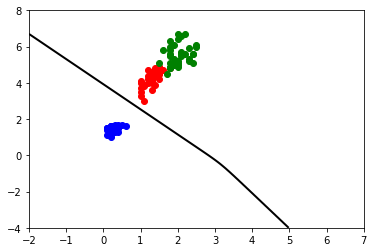

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 7, 200), np.linspace(-4, 8, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
# probabilities_qda = clf[i].predict_proba(X_grid)[:,2].reshape(xx.shape)
probabilities_qda2 = model.predict_proba(X_grid)[:,0].reshape(xx.shape)
# probabilities_qda2 = clf[i].predict_proba(X_grid)[:,1].reshape(xx.shape)
print(xx.shape,yy.shape,X_grid.shape,probabilities_qda2.shape)
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(x_train[y_train==0][l[i][0]], x_train[y_train==0][l[i][1]], c='b', label='0')
splot.scatter(x_train[y_train==1][l[i][0]], x_train[y_train==1][l[i][1]], c='r', label='0')
splot.scatter(x_train[y_train==2][l[i][0]], x_train[y_train==2][l[i][1]], c='g', label='0')

# plot_ellipse(splot, model.means_[0], models[i].covariance_[0], 'b')
# plot_ellipse(splot, model.means_[1], models[i].covariance_[1], 'r')
# plot_ellipse(splot, model.means_[2], models[i].covariance_[2], 'g')

plt.contour(xx, yy, probabilities_qda2, [0.5], linewidths=2., colors='k')
plt.show()

8]

In [ ]:
print("Error rate for LDA model:", 1 - acc(y_test, model.predict(nx_test)))
print("Error rate for QDA model:", 1 - acc(y_test, models[2].predict(nx_test)))

# QDA performed better

Error rate for LDA model: 0.06666666666666665
Error rate for QDA model: 0.0444444444444444


9]

Plots for QDA:



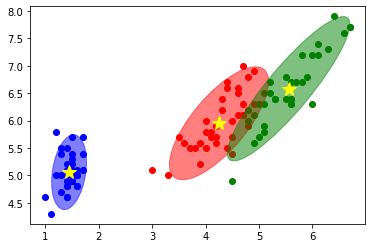

Plots for QDA:



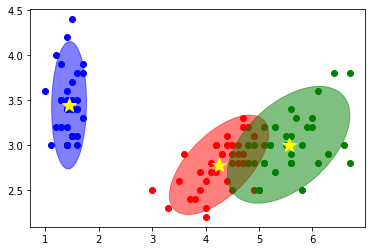

Plots for QDA:



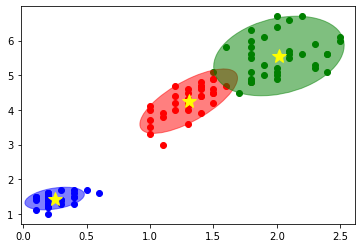

Plot for LDA
(200, 200) (200, 200) (40000, 2) (200, 200)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


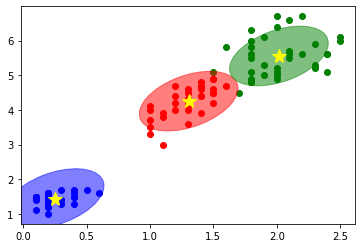

In [ ]:
for i in range(3):

    print("Plots for QDA:\n")

    splot = plt.figure()
    splot = plt.subplot(1, 1, 1)

    splot.scatter(x_train[y_train==0][l[i][0]], x_train[y_train==0][l[i][1]], c='b', label='0')
    splot.scatter(x_train[y_train==1][l[i][0]], x_train[y_train==1][l[i][1]], c='r', label='0')
    splot.scatter(x_train[y_train==2][l[i][0]], x_train[y_train==2][l[i][1]], c='g', label='0')

    plot_ellipse(splot, models[i].means_[0], models[i].covariance_[0], 'b')
    plot_ellipse(splot, models[i].means_[1], models[i].covariance_[1], 'r')
    plot_ellipse(splot, models[i].means_[2], models[i].covariance_[2], 'g')

    plt.show()

print("Plot for LDA")
xx, yy = np.meshgrid(np.linspace(-2, 7, 200), np.linspace(-4, 8, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
# probabilities_qda = clf[i].predict_proba(X_grid)[:,2].reshape(xx.shape)
probabilities_qda2 = model.predict_proba(X_grid)[:,0].reshape(xx.shape)
# probabilities_qda2 = clf[i].predict_proba(X_grid)[:,1].reshape(xx.shape)
print(xx.shape,yy.shape,X_grid.shape,probabilities_qda2.shape)
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(x_train[y_train==0][l[i][0]], x_train[y_train==0][l[i][1]], c='b', label='0')
splot.scatter(x_train[y_train==1][l[i][0]], x_train[y_train==1][l[i][1]], c='r', label='0')
splot.scatter(x_train[y_train==2][l[i][0]], x_train[y_train==2][l[i][1]], c='g', label='0')

plot_ellipse(splot, model.means_[0], model.covariance_, 'b')
plot_ellipse(splot, model.means_[1], model.covariance_, 'r')
plot_ellipse(splot, model.means_[2], model.covariance_, 'g')
plt.show()

#Q2]

1]

List of means: [[1.464, 0.2439999999999999], [4.26, 1.3259999999999998], [5.552, 2.026]]
List of Covariance Matrices:
 [              petal length  petal width
petal length      0.030106     0.005698
petal width       0.005698     0.011494,               petal length  petal width
petal length      0.220816     0.073102
petal width       0.073102     0.039106,               petal length  petal width
petal length      0.304588     0.048824
petal width       0.048824     0.075433]

    petal length  petal width
47           1.4          0.2
3            1.5          0.2
31           1.5          0.4
25           1.6          0.2
15           1.5          0.4


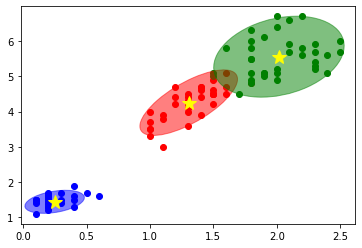

In [ ]:
df1 = pd.concat([df["petal length"], df["petal width"]],  axis = 1)
df1

x_train,x_test,y_train,y_test = train_test_split(df1, y, train_size = 0.7, random_state=3)

dfList = []
for i in range(3):
    dfList.append(df1[df['class'] == i])

tempCount = 0
meanList = []
for i in dfList:
    meanList.append([i['petal length'].mean(), i['petal width'].mean()])
    
print("List of means:", meanList)

covList = []
for i in range(3):
    covList.append(dfList[i].cov())

print("List of Covariance Matrices:\n", covList)
print()
print(x_test.head())

splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(x_train[y_train==0][l[2][0]], x_train[y_train==0][l[2][1]], c='b', label='0')
splot.scatter(x_train[y_train==1][l[2][0]], x_train[y_train==1][l[2][1]], c='r', label='0')
splot.scatter(x_train[y_train==2][l[2][0]], x_train[y_train==2][l[2][1]], c='g', label='0')

plot_ellipse(splot, models[2].means_[0], models[2].covariance_[0], 'b')
plot_ellipse(splot, models[2].means_[1], models[2].covariance_[1], 'r')
plot_ellipse(splot, models[2].means_[2], models[2].covariance_[2], 'g')

plt.show()


2]

In [ ]:
from scipy import linalg
import math

def compute_likelihood(x, covList, meanList, Class):
    ans = (-1/2) * np.cross(np.cross(np.subtract(x, meanList[Class]), np.linalg.inv(covList[Class])),  np.transpose(np.subtract(x, meanList[Class])))
    ans -= (1/2) * math.log(np.linalg.det(covList[Class]))
    return (ans)

indx = x_test.index
print(compute_likelihood(x_test.loc[indx[0]], covList, meanList, 0))
print(compute_likelihood(x_test.loc[indx[0]], covList, meanList, 1))
print(compute_likelihood(x_test.loc[indx[0]], covList, meanList, 2))

4.31702801207024
356.2986510684913
153.52103152178114


3]

In [ ]:
def FindCount(x, val):
    count = 0
    for i in x:
        if(i == val):
            count+=1
    
    return count

def classify(x, covList, meanList, y_train):
    l = []
    for i in range(3):
        l.append(compute_likelihood(x, covList, meanList, i) + math.log( FindCount(y_train, i) / len(x)))
    return l.index(min(l))

4]

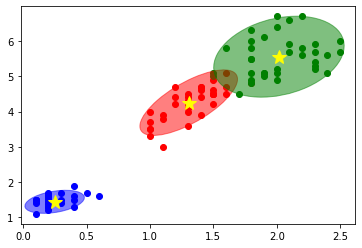

In [ ]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(x_train[y_train==0][l[2][0]], x_train[y_train==0][l[2][1]], c='b', label='0')
splot.scatter(x_train[y_train==1][l[2][0]], x_train[y_train==1][l[2][1]], c='r', label='0')
splot.scatter(x_train[y_train==2][l[2][0]], x_train[y_train==2][l[2][1]], c='g', label='0')

plot_ellipse(splot, models[2].means_[0], models[2].covariance_[0], 'b')
plot_ellipse(splot, models[2].means_[1], models[2].covariance_[1], 'r')
plot_ellipse(splot, models[2].means_[2], models[2].covariance_[2], 'g')

plt.show()

5]

In [ ]:
i = 2
model = QuadraticDiscriminantAnalysis(store_covariance = True)
model.fit(pd.concat([pd.DataFrame(x_train[l[i][0]]), pd.DataFrame(x_train[l[i][1]])], axis = 1), y_train)
print("QDA Accuracy", l[i][0], l[i][1], ":", acc(y_test, model.predict(pd.concat([pd.DataFrame(x_test[l[i][0]]), pd.DataFrame(x_test[l[i][1]])], axis = 1))) * 100, "%")
indx = x_test.index
pred = []

for i in range(len(indx)):
    pred.append(classify(x_test.loc[indx[i]], covList, meanList, y_train))

print("Guassian Likelihood accuracy", acc(y_test, pred) * 100, "%")

for i in range(3):
    print("Covariance Matrix of class \n", i, covList[i])
    print("Means of class \n", i, meanList[i])
    print()

QDA Accuracy petal width petal length : 100.0 %
Guassian Likelihood accuracy 91.11111111111111 %
Covariance Matrix of class 
 0               petal length  petal width
petal length      0.030106     0.005698
petal width       0.005698     0.011494
Means of class 
 0 [1.464, 0.2439999999999999]

Covariance Matrix of class 
 1               petal length  petal width
petal length      0.220816     0.073102
petal width       0.073102     0.039106
Means of class 
 1 [4.26, 1.3259999999999998]

Covariance Matrix of class 
 2               petal length  petal width
petal length      0.304588     0.048824
petal width       0.048824     0.075433
Means of class 
 2 [5.552, 2.026]



#Q3]

In [ ]:
x_train = pd.read_csv("/content/train.csv", delimiter=" ", header = None, names = ["docId", "termId", "Count"])
y_train = pd.read_csv("/content/train.label", header = None, names = ["Label"])
x_test = pd.read_csv("/content/test.csv", delimiter=" ",header = None, names = ["docId", "termId", "Count"])
y_test = pd.read_csv("/content/test.label", header = None, names = ["Label"])

y_train["docId"] = range(1, len(y_train) + 1)
y_test["docId"] = range(1, len(y_test) + 1)

mapper1 = dict(zip(y_train["docId"], y_train["Label"]))
mapper2 = dict(zip(y_test["docId"], y_test["Label"]))

x_train.loc[:, "Label"] = x_train['docId'].map(mapper1)
x_test.loc[:, "Label"] = x_test['docId'].map(mapper2)

# x_train = x_train[["docId", "termId", "Count"]]
# x_test = x_test[["docId", "termId", "Count"]]
y_train = y_train[["Label"]]
y_test = y_test[["Label"]]

print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())


print(len(x_train), len(y_train), len(x_test), len(y_test))

   docId  termId  Count  Label
0      1       1      4      1
1      1       2      2      1
2      1       3     10      1
3      1       4      4      1
4      1       5      2      1
   docId  termId  Count  Label
0      1       3      1      1
1      1      10      1      1
2      1      12      8      1
3      1      17      1      1
4      1      23      8      1
   Label
0      1
1      1
2      1
3      1
4      1
   Label
0      1
1      1
2      1
3      1
4      1
1467345 11269 967874 7505


1]

In [ ]:
def Likelihood(df):
    dfij = df.groupby(["Label", "termId"])
    dfj = df.groupby(["Label"])
    return (dfij["Count"].sum() / dfj["Count"].sum()).unstack()

lh = Likelihood(x_train)
lh=lh.replace(np.nan,0)
lh


termId,1,2,3,4,5,6,7,8,9,10,...,53966,53967,53968,53969,53970,53971,53972,53973,53974,53975
Label,,,,,,,,,,,,,,,,,,,,,
1,0.000087,0.000423,0.001848,0.000060,0.000551,0.000276,0.000040,0.000007,0.000228,0.000941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000544,0.000535,0.000000,0.000154,0.000127,0.000526,0.000091,0.000054,0.001559,0.000027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000121,0.000760,0.000000,0.000187,0.000231,0.000375,0.000022,0.000022,0.001586,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000081,0.000313,0.000000,0.000000,0.000101,0.000484,0.000020,0.000010,0.000484,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000070,0.000383,0.000000,0.000012,0.000012,0.000545,0.000012,0.000000,0.000545,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000307,0.001452,0.000000,0.000517,0.000098,0.000340,0.000137,0.000020,0.001551,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000458,0.000000,0.000033,0.000033,0.000524,0.000000,0.000000,0.000458,0.000049,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000079,0.000473,0.000000,0.000000,0.000114,0.000754,0.000061,0.000026,0.000158,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000136,0.000653,0.000000,0.000039,0.000039,0.000809,0.000029,0.000010,0.000039,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


2]

In [ ]:
labelCount = np.zeros(21)
for i in y_train.Label:
    labelCount[i] += 1

tempArr = lh.to_numpy()
for i in range(len(tempArr)):
    for j in range(len(tempArr[i])):
        tempArr[i][j] = 1/(labelCount[i+1])

pd.DataFrame(tempArr)


,0,1,2,3,4,5,6,7,8,9,...,53965,53966,53967,53968,53969,53970,53971,53972,53973,53974
0,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,...,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083
1,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,...,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721
2,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,...,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748,0.001748
3,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,...,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704,0.001704
4,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,...,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739,0.001739
5,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,...,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689
6,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,...,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718,0.001718
7,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,...,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689,0.001689
8,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,...,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678,0.001678
9,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,...,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684


3]

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(x_train[["docId", "termId", "Count"]], x_train[["Label"]])
pred = model.predict(x_test[["docId", "termId", "Count"]])
print(acc(x_test[["Label"]], pred) * 1000, "%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


88.44952958752896 %
